In [83]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import json
import ogr
import folium

In [63]:
#THIS FILE IS NOT INCLUDED IN THE GITHUB REPOSITYORY! Because of its filesize of 850MB (too large for GitHub).
#BEFORE RUNNING THIS CODE, UNPACK THE FULL_DF.ZIP FILE! DO NOT COMMIT THE FILE TO THE REPO!
df = pd.read_csv("data/full_df_sos.zip").drop(columns="Unnamed: 0")

In [64]:
buurten = gpd.read_file("output/buurten.shp")
short_df = df[df["size-of-std"]==0.05]
buurten_merge = buurten.merge(short_df.reset_index(),left_on="BUURTCODE",right_on="Neighborhood number")

In [65]:
eth_list = ['KPI-p-dutch','KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco','KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian','KPI-p-eastern-eu', 'KPI-p-other-nonwestern']
eth_choices = ["Dutch","Other Western","Antillean","Moroccan","Surinamese","Turkish","Indonesian","Eastern European","Other Non-Western"]

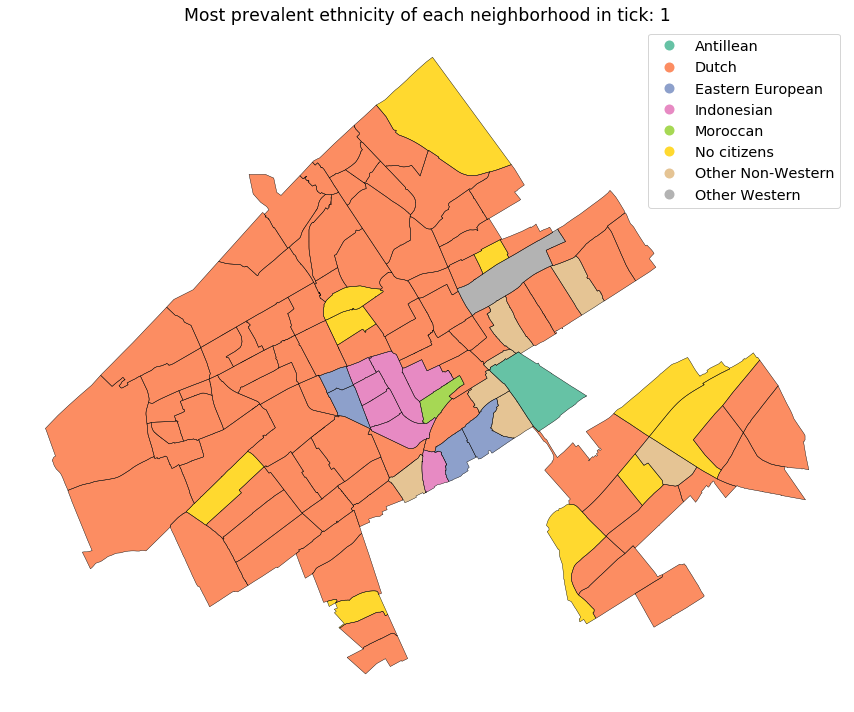

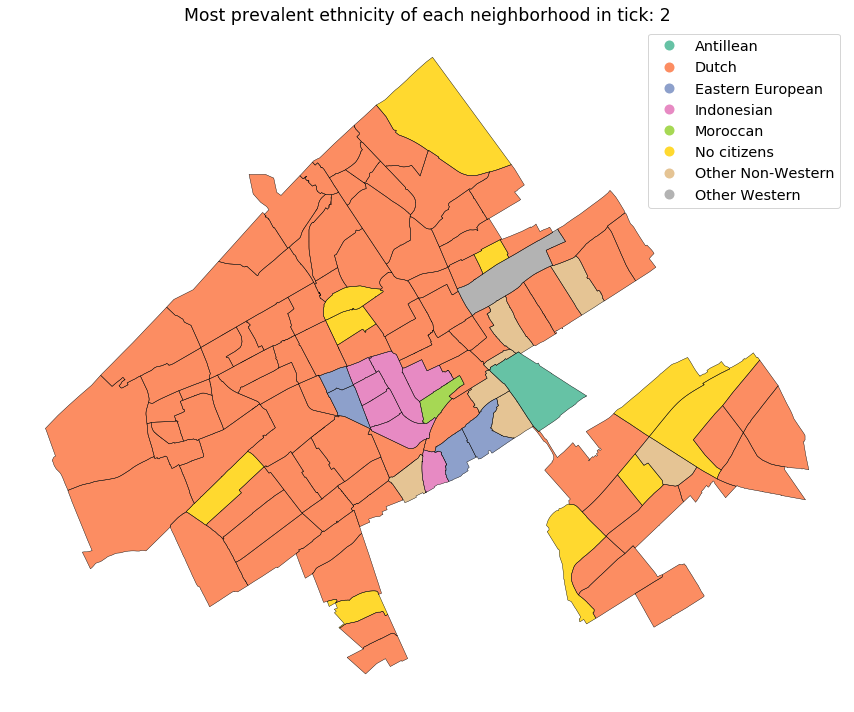

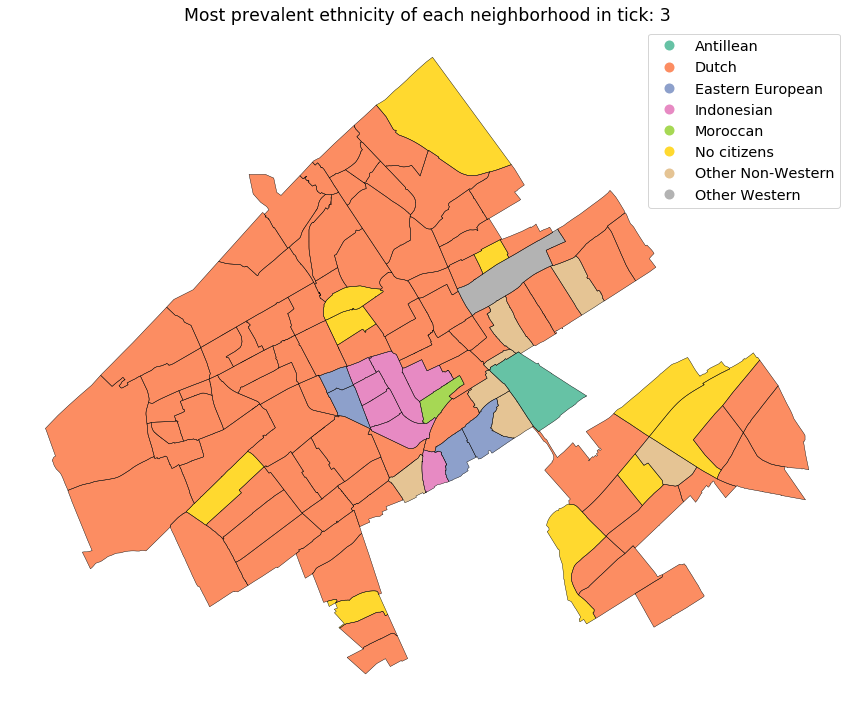

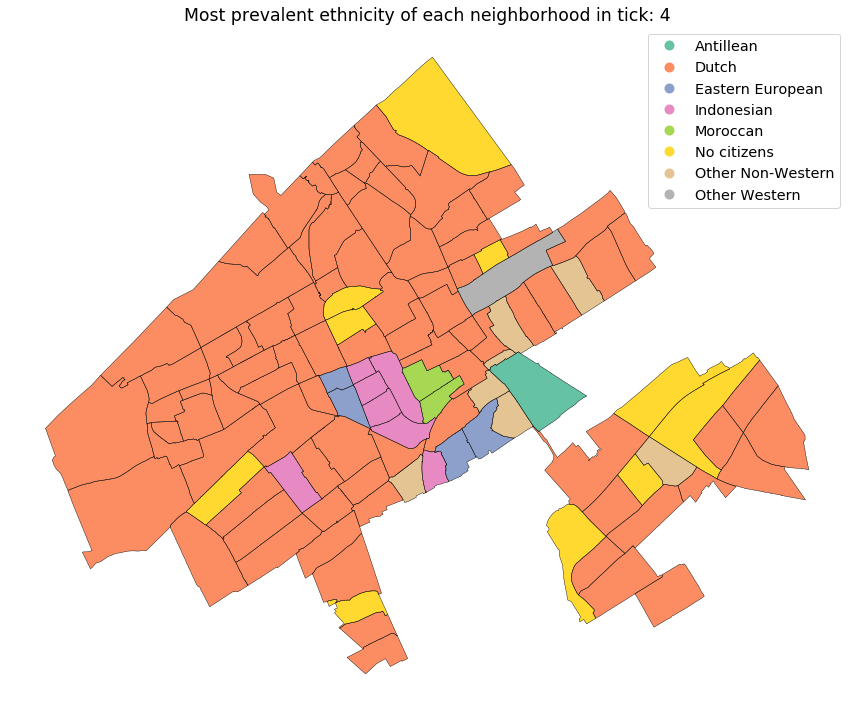

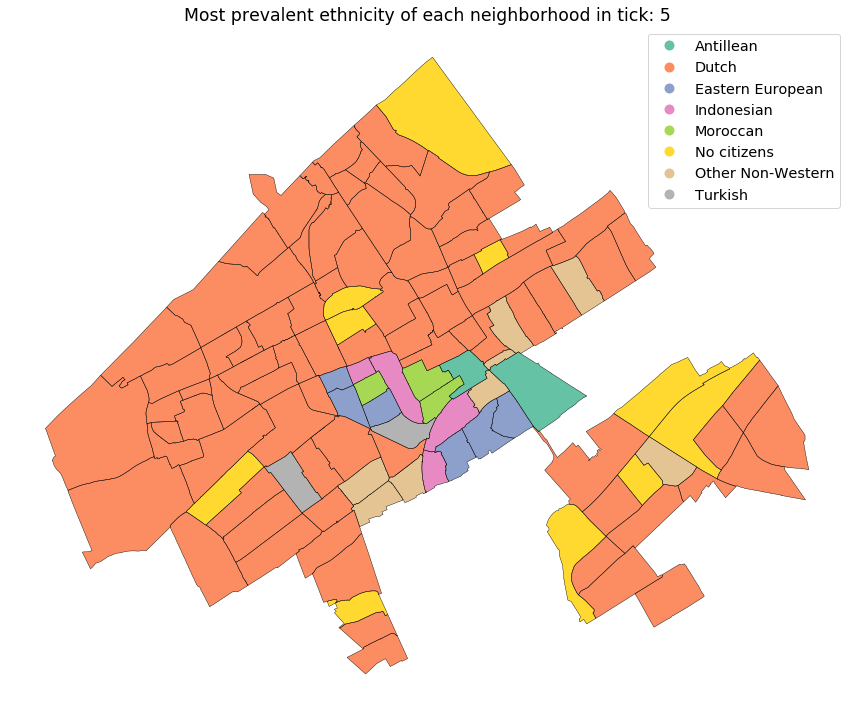

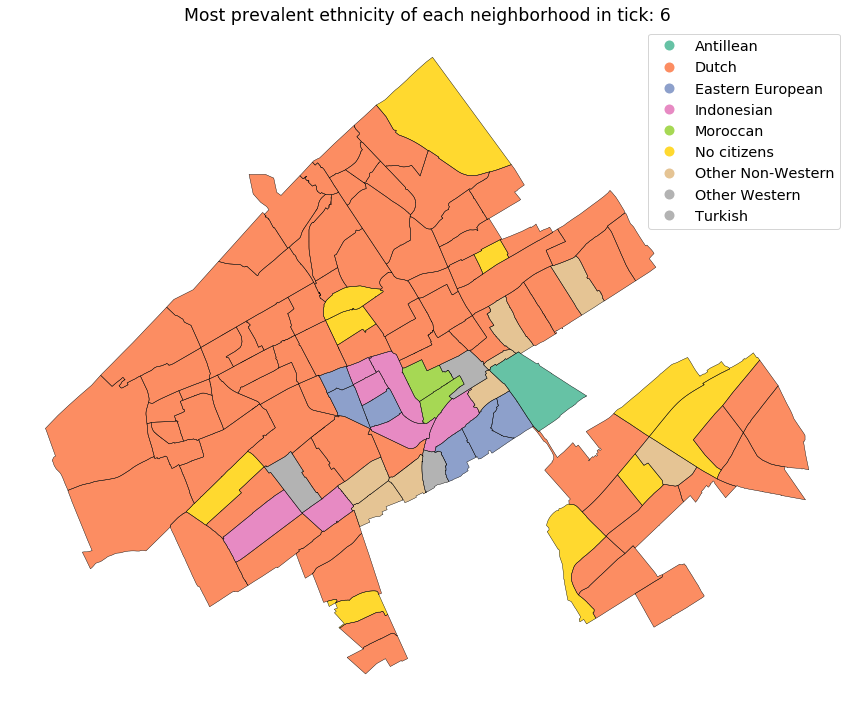

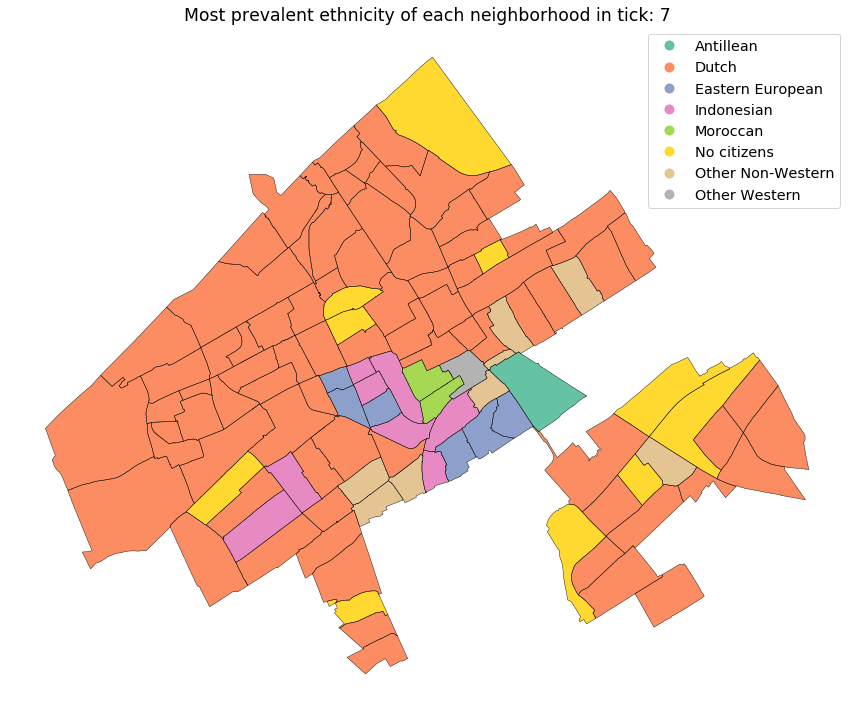

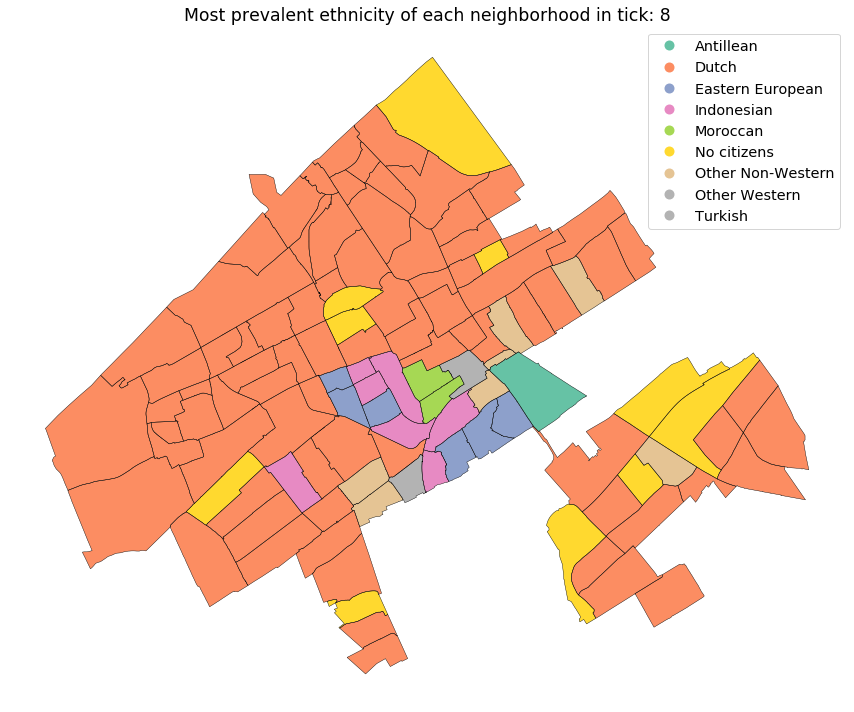

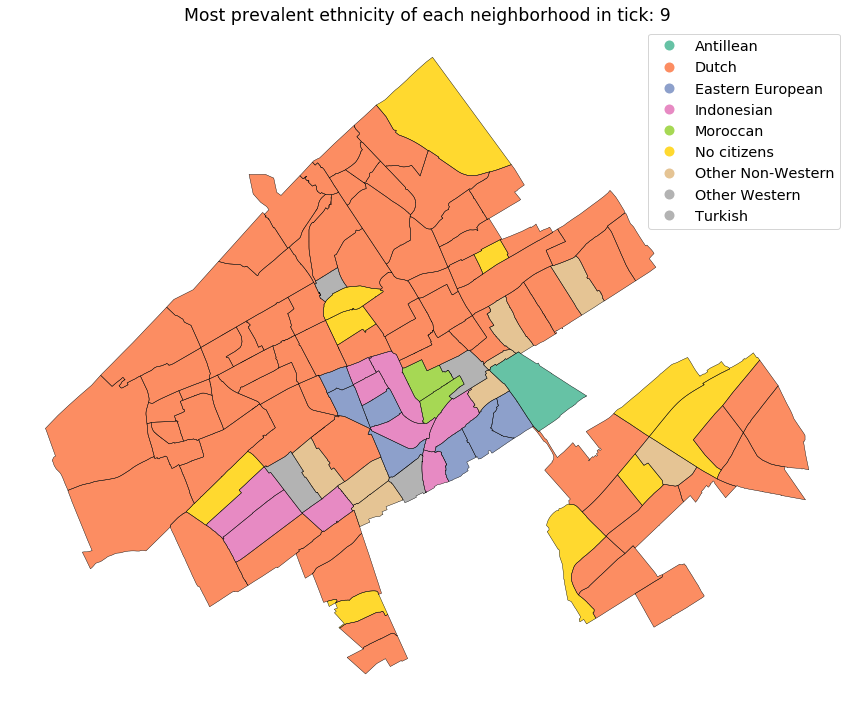

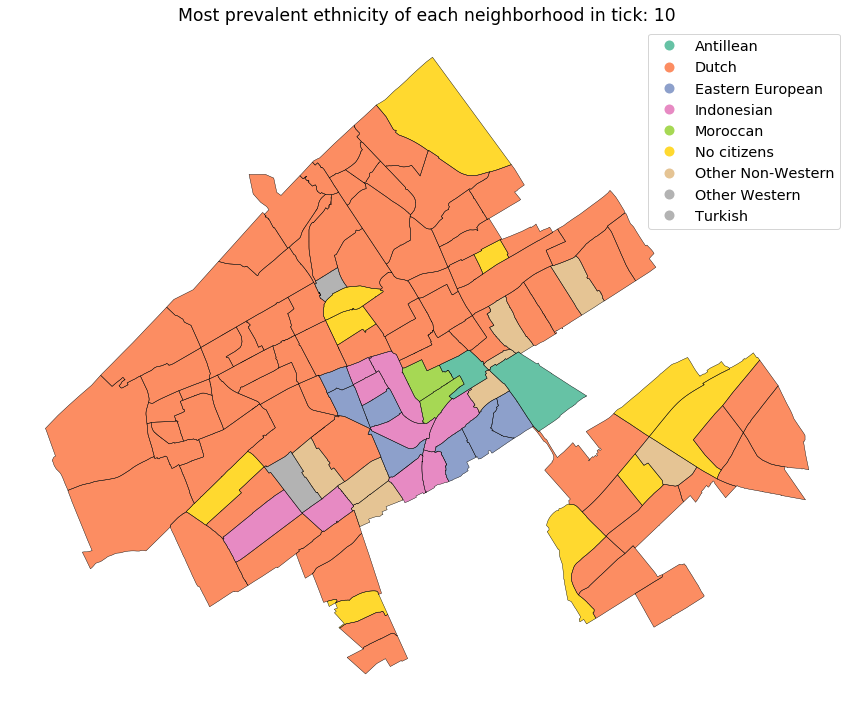

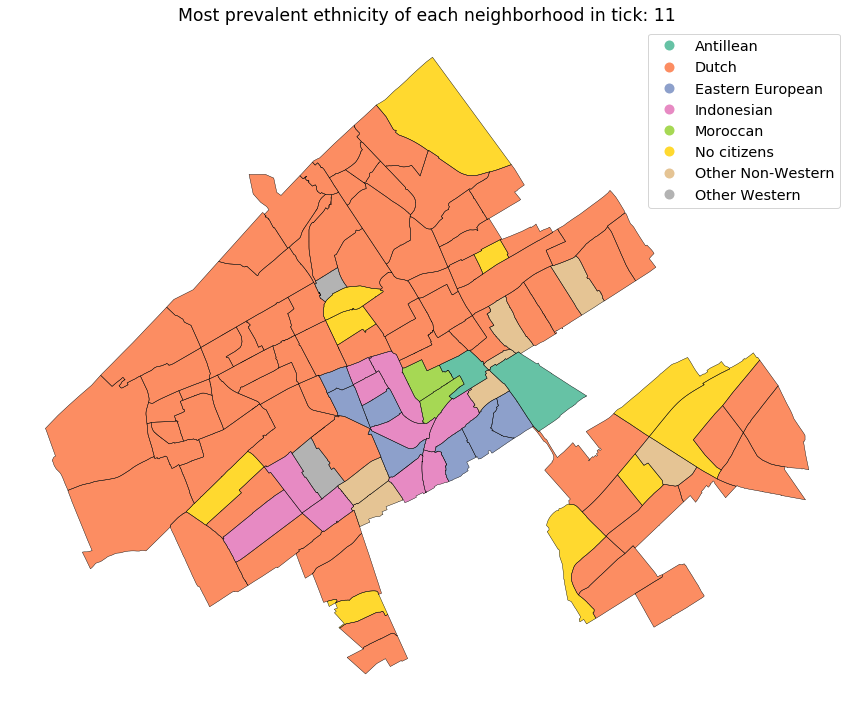

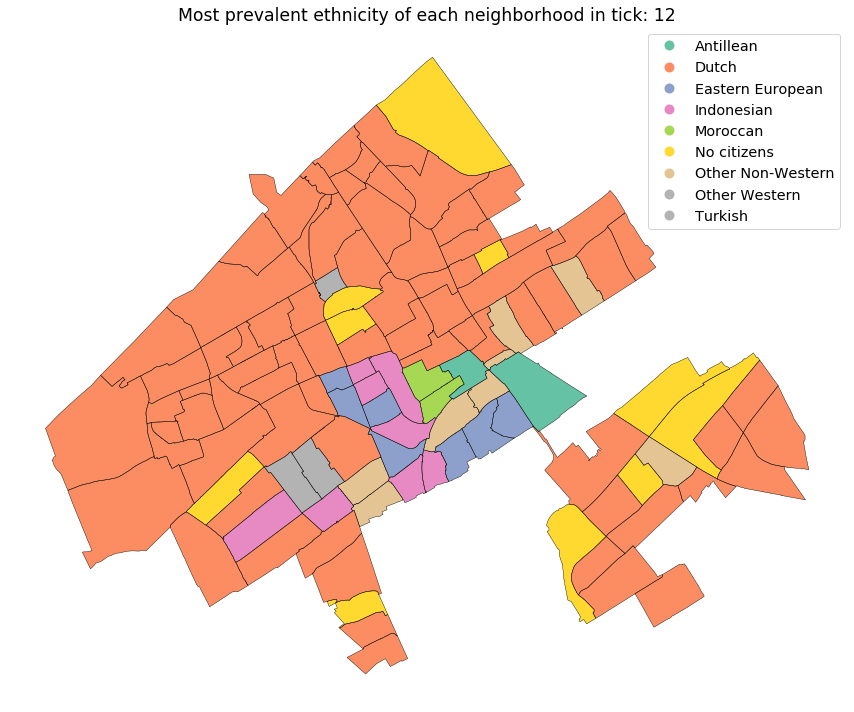

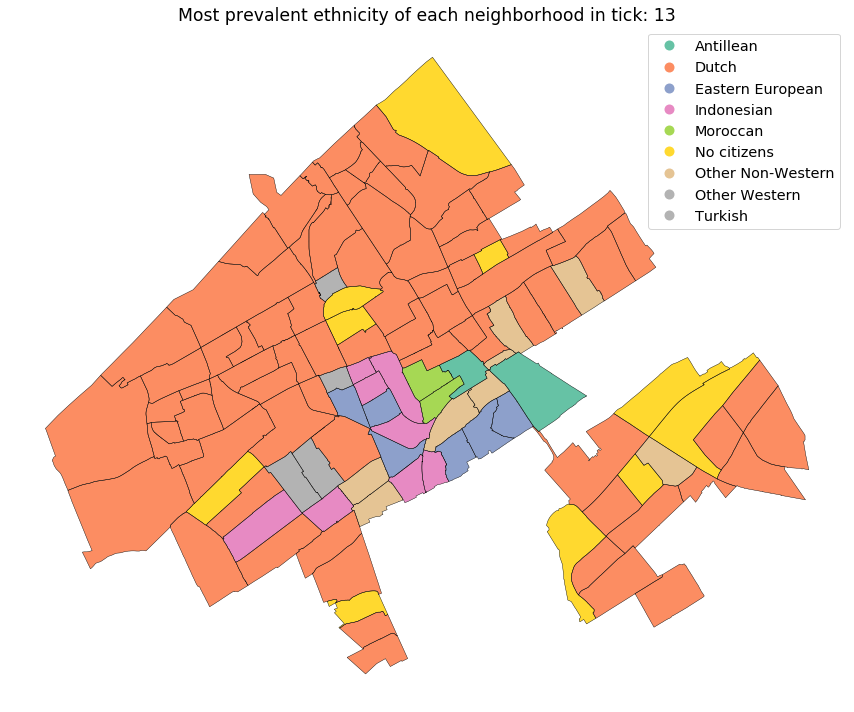

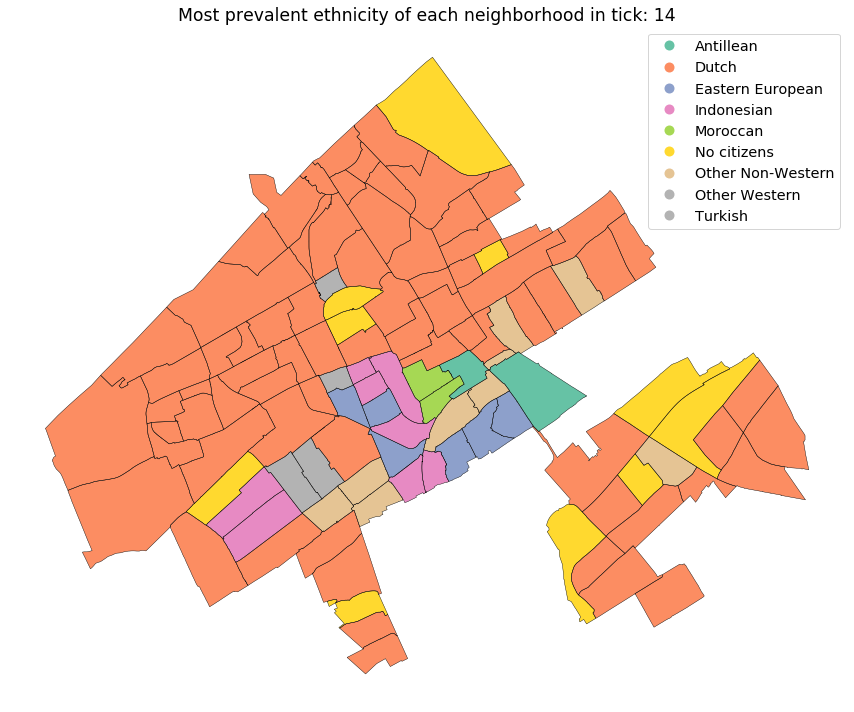

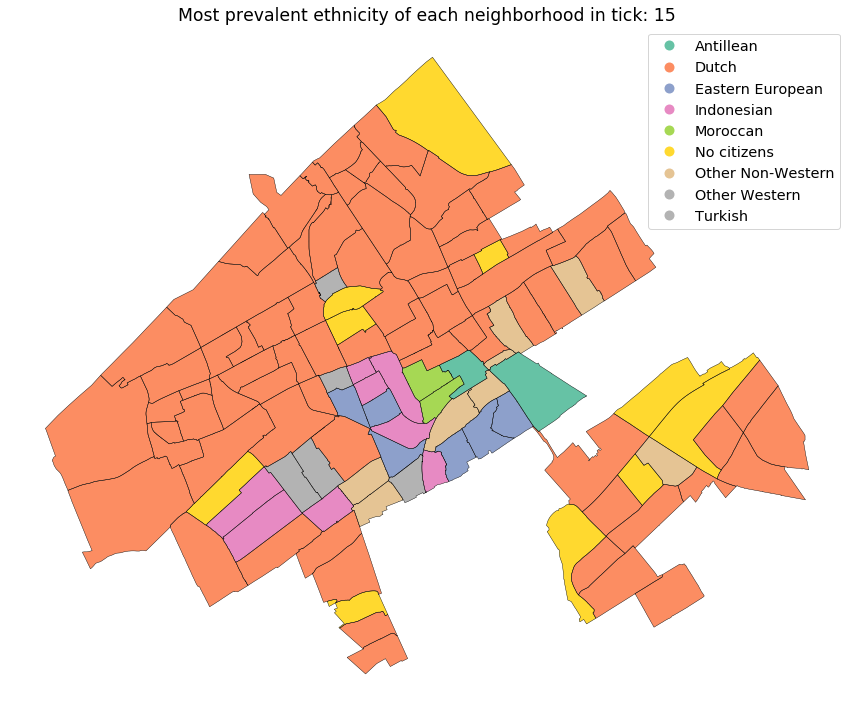

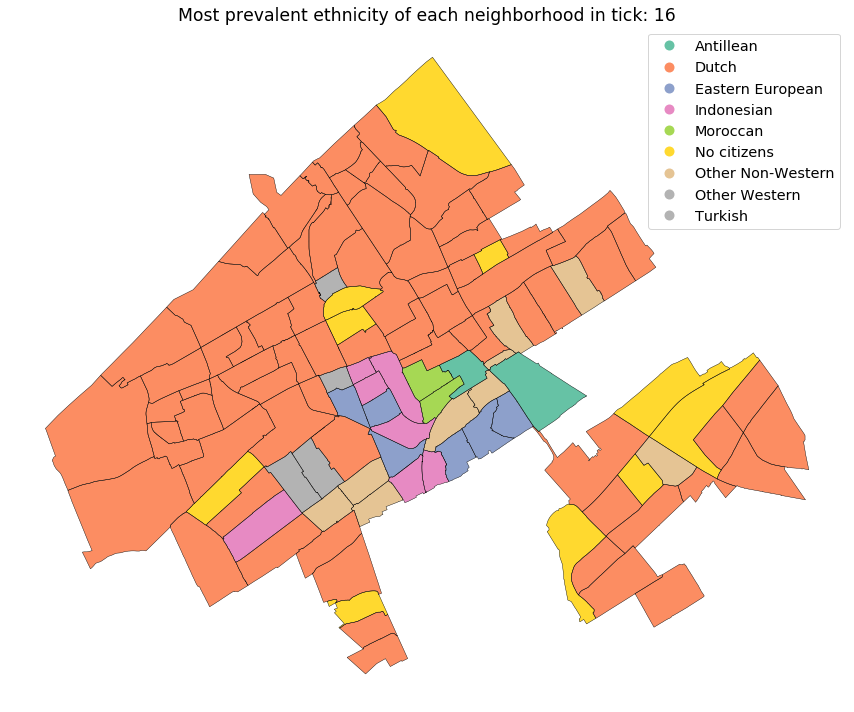

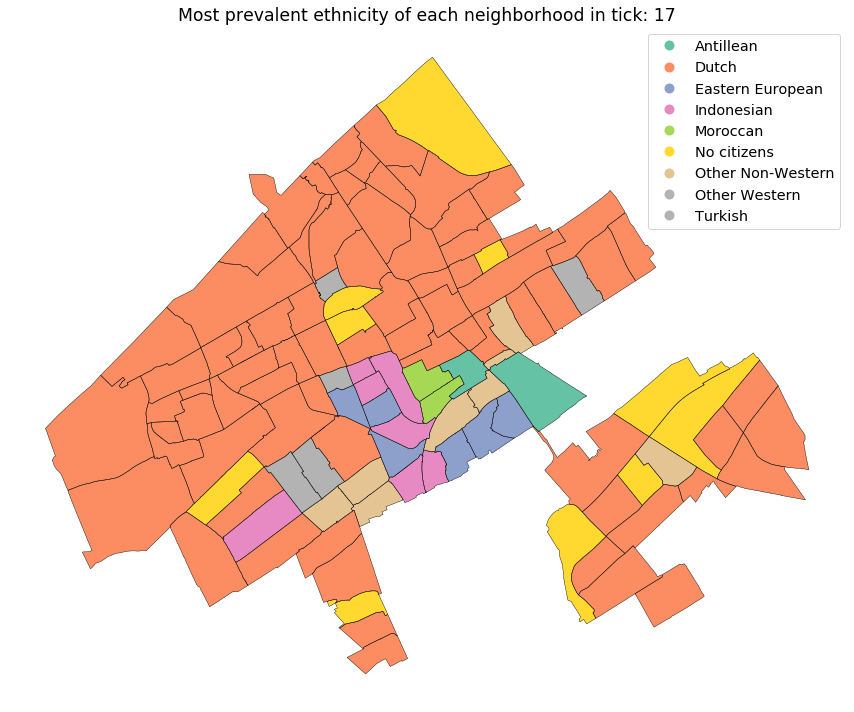

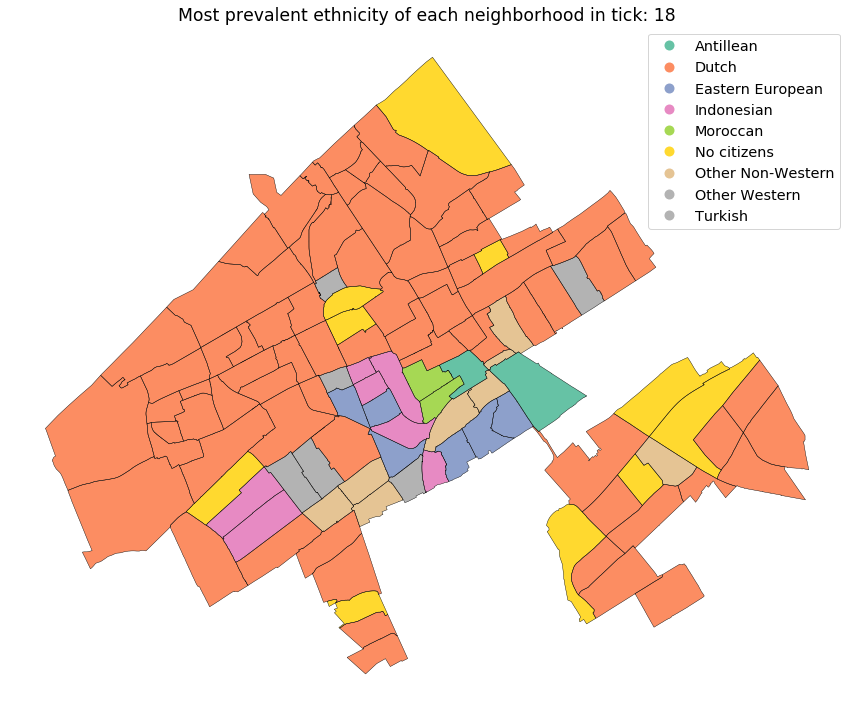

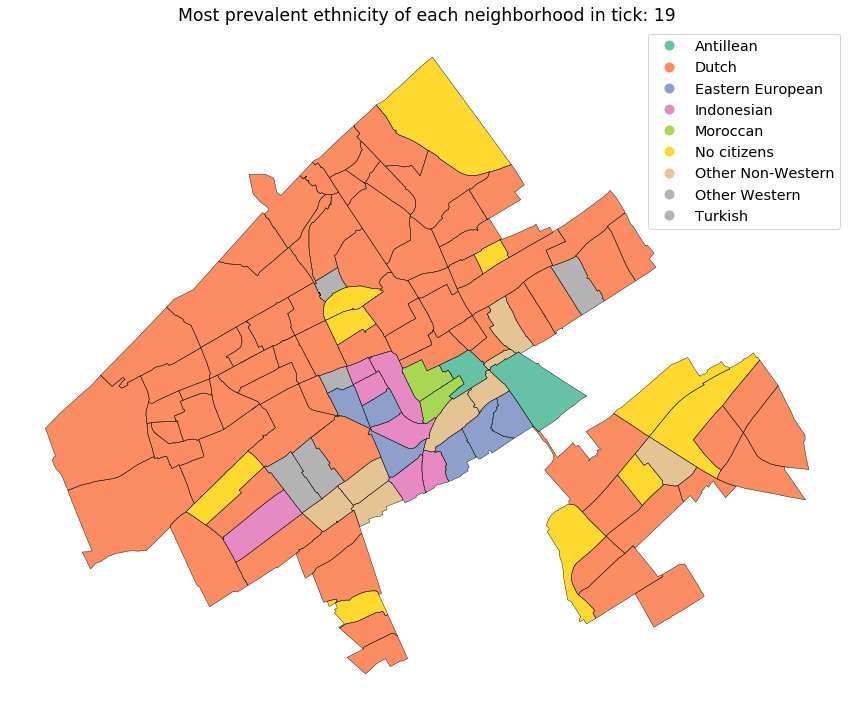

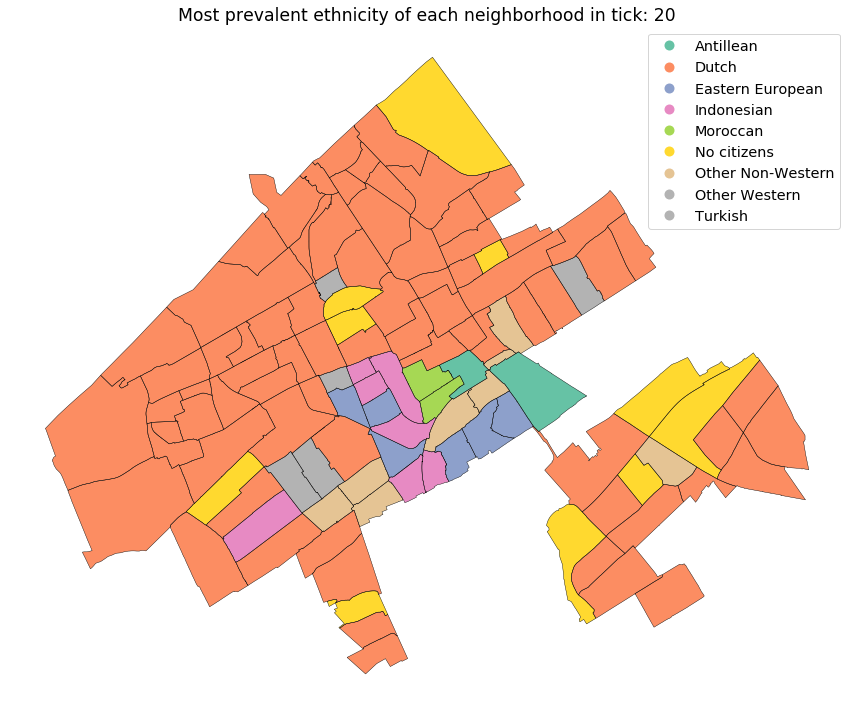

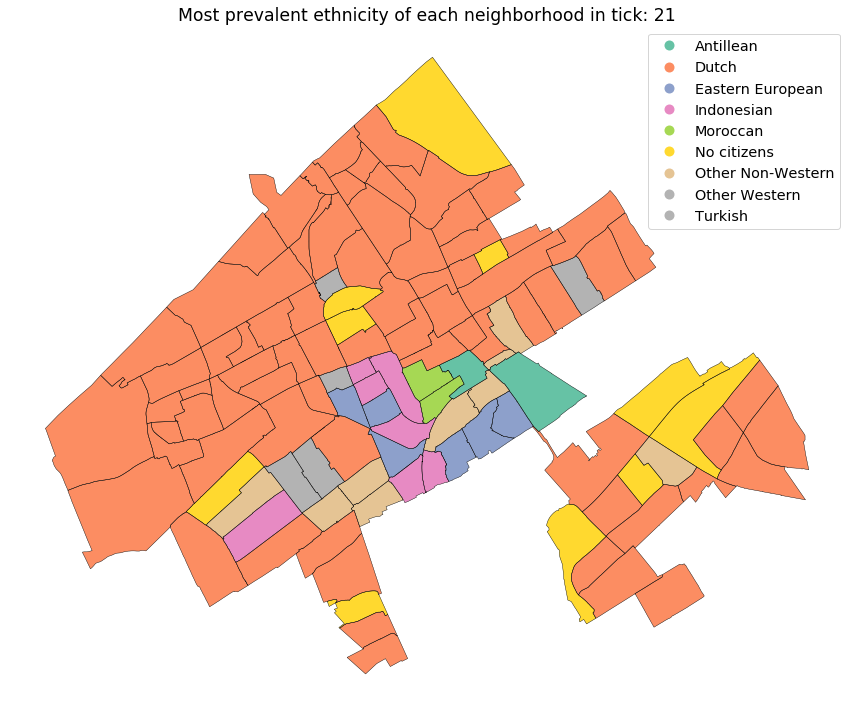

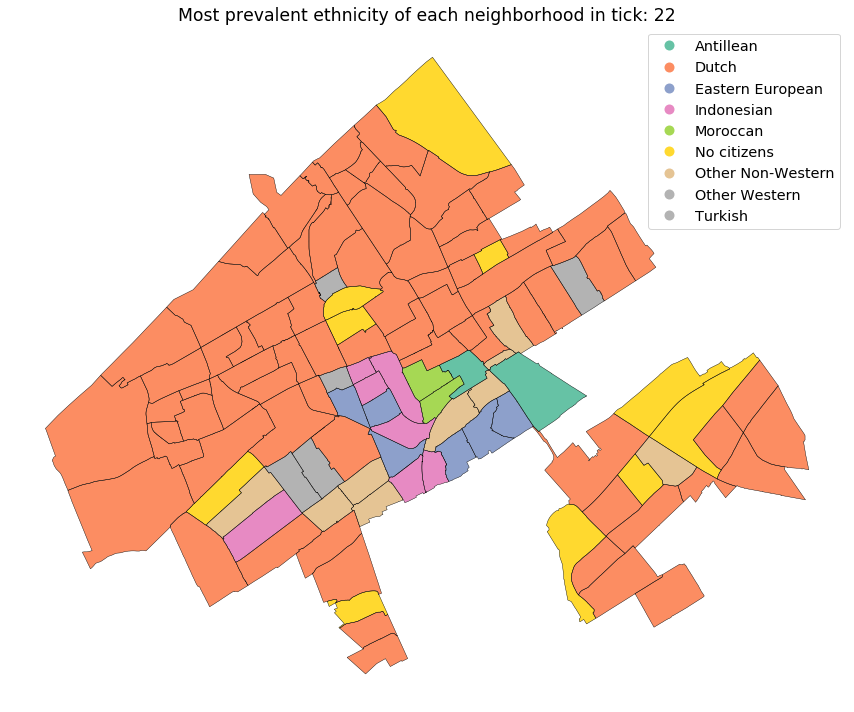

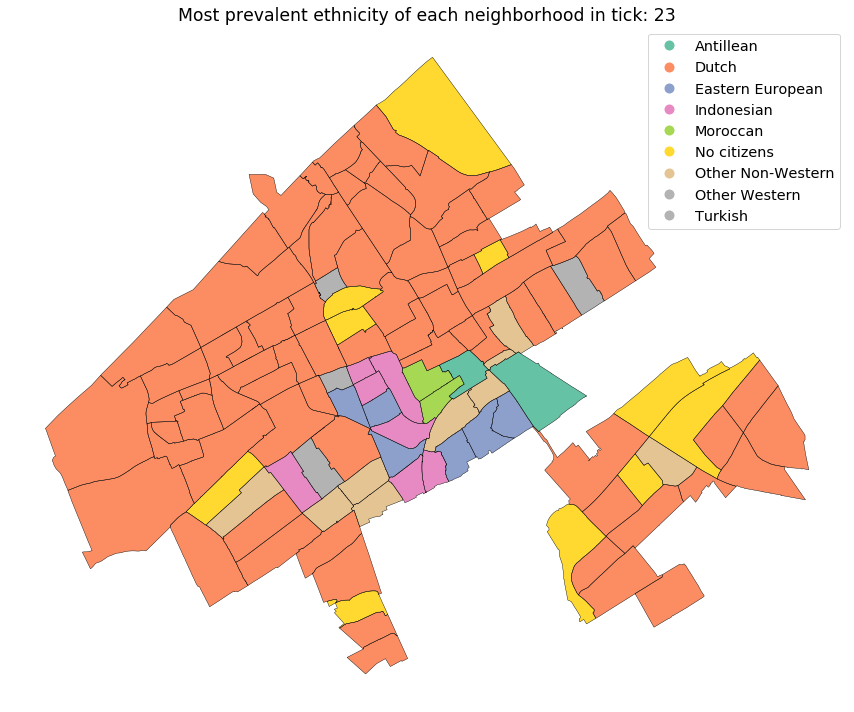

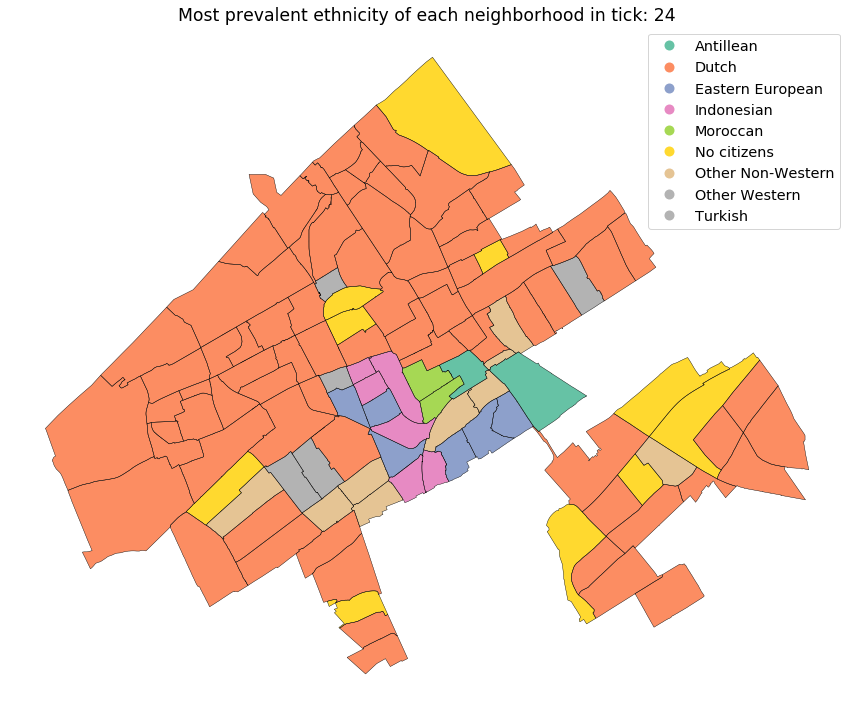

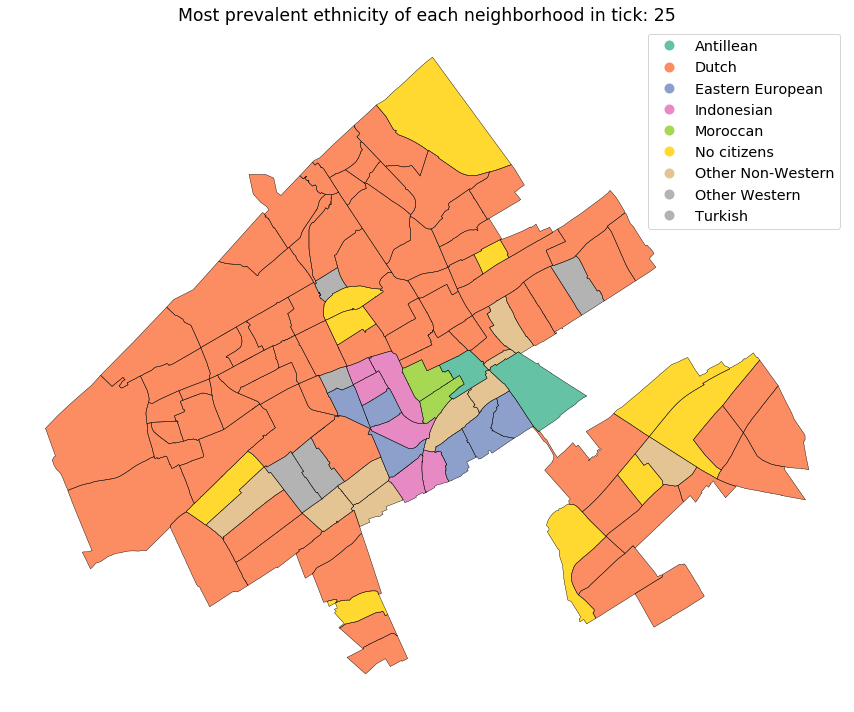

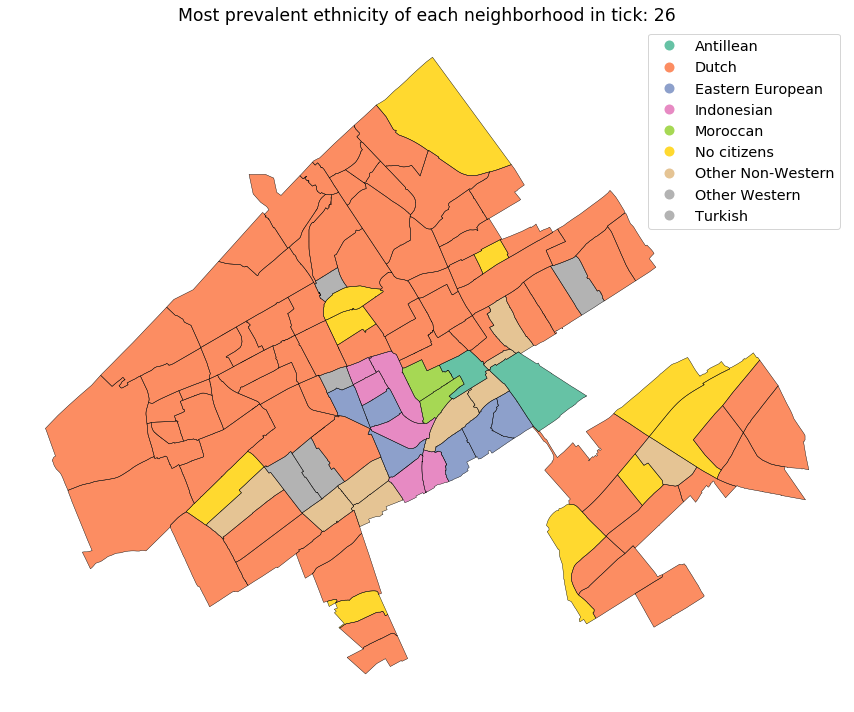

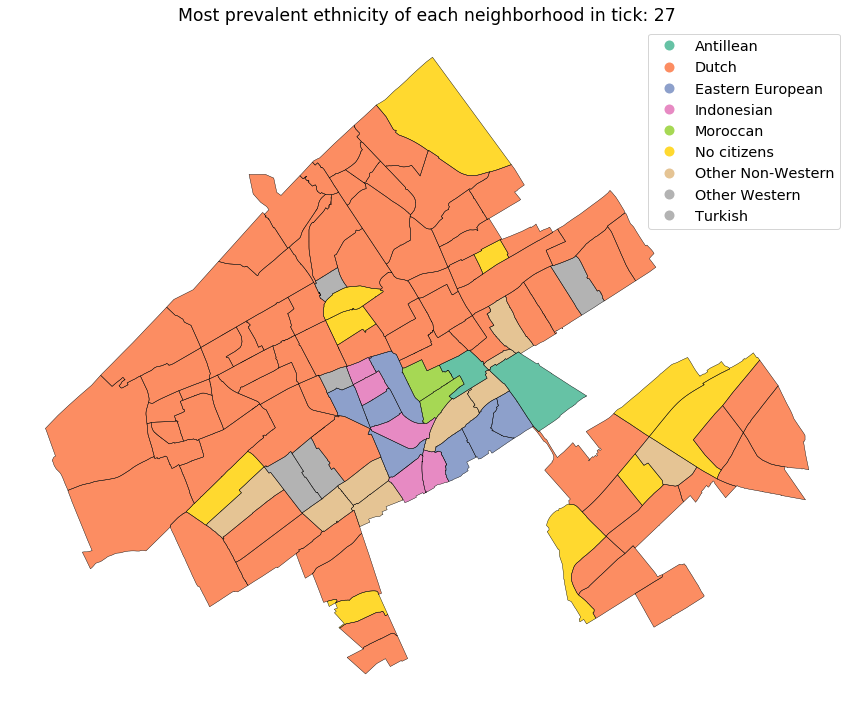

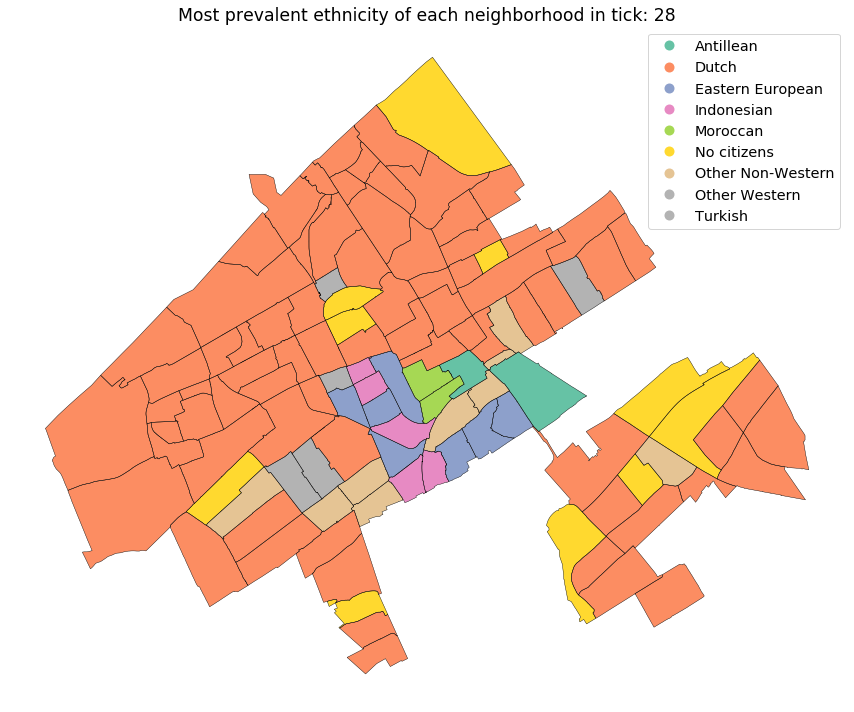

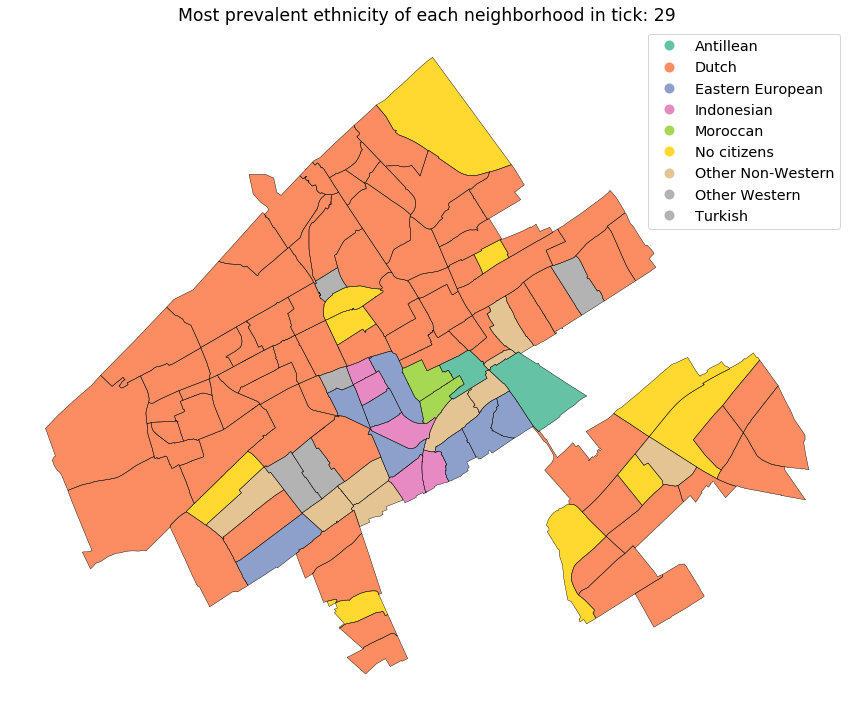

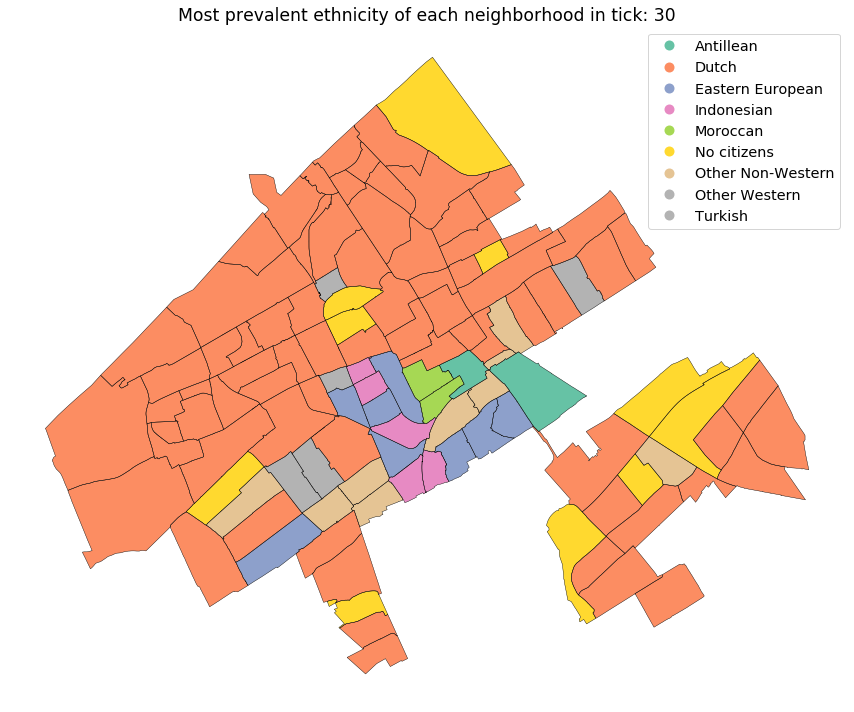

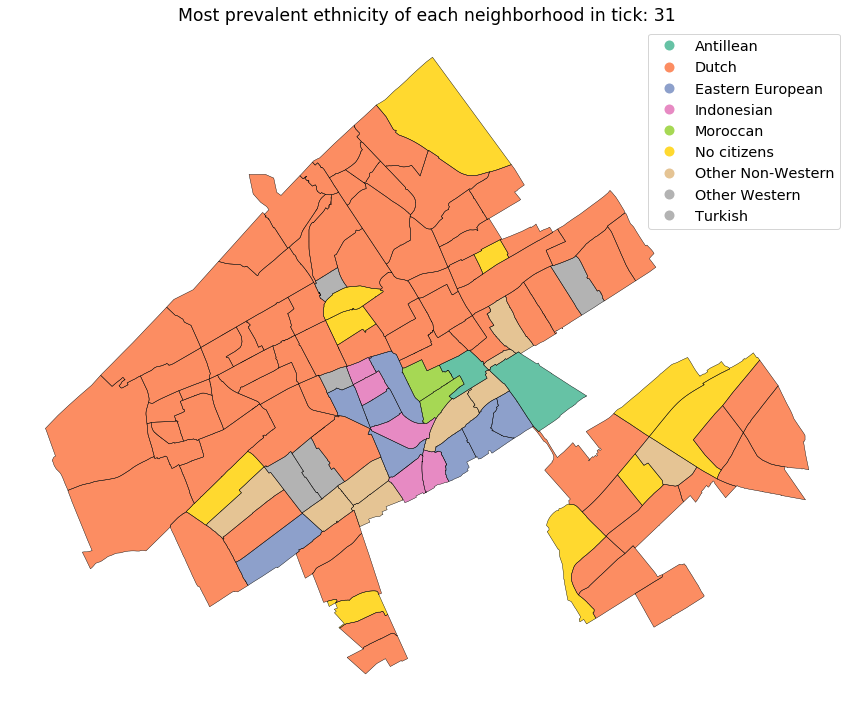

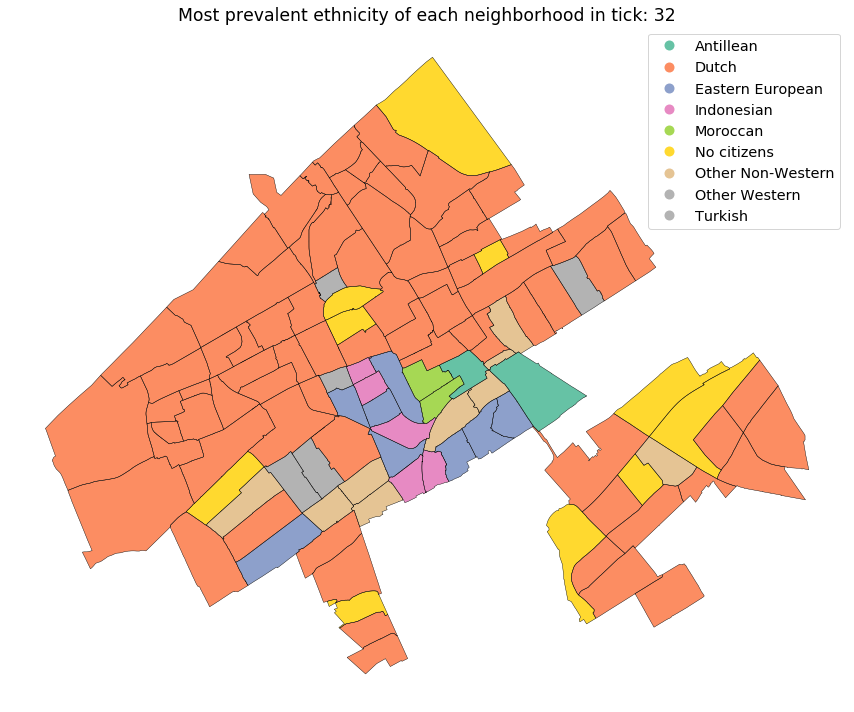

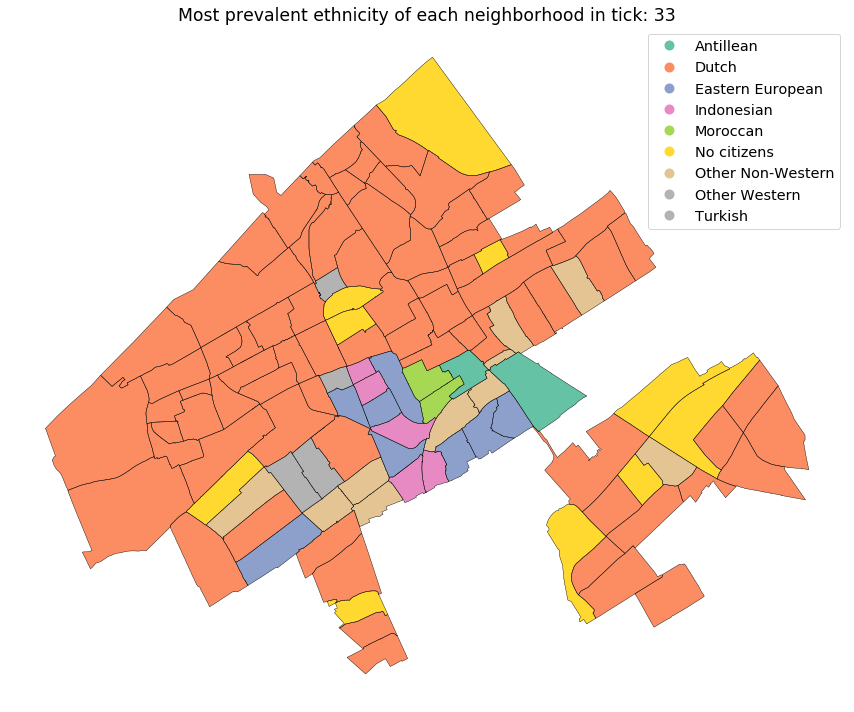

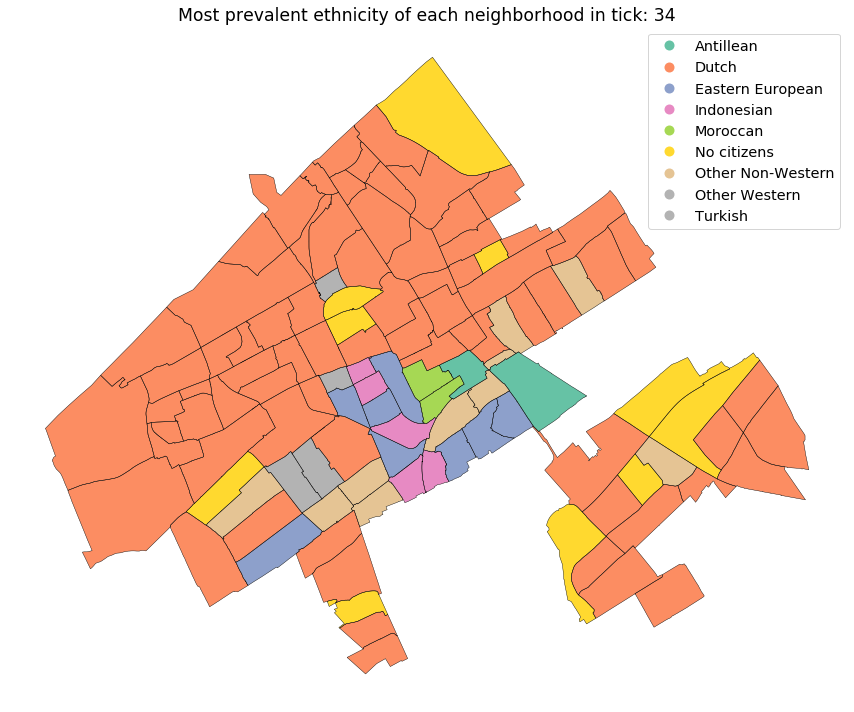

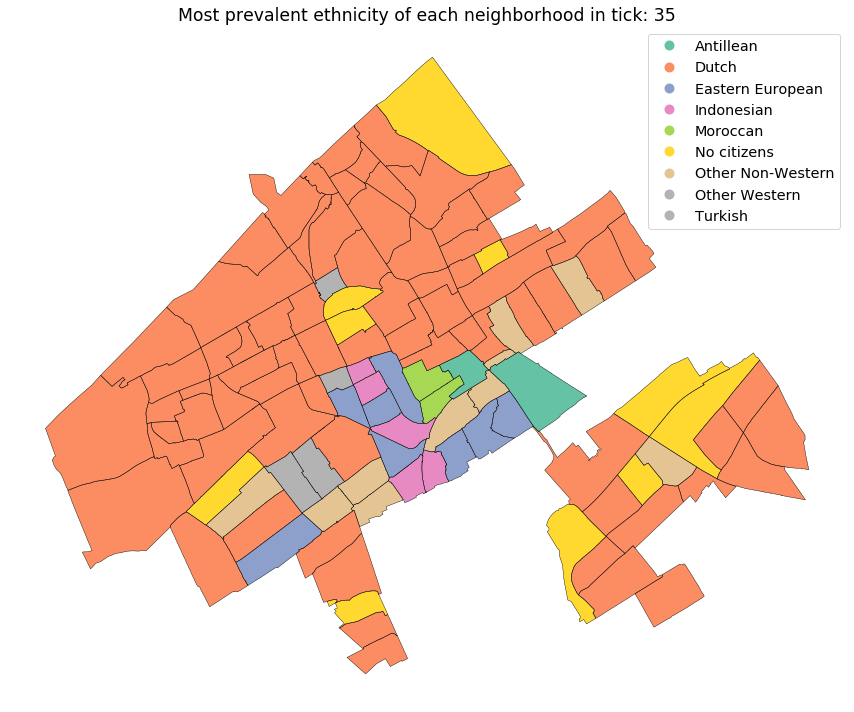

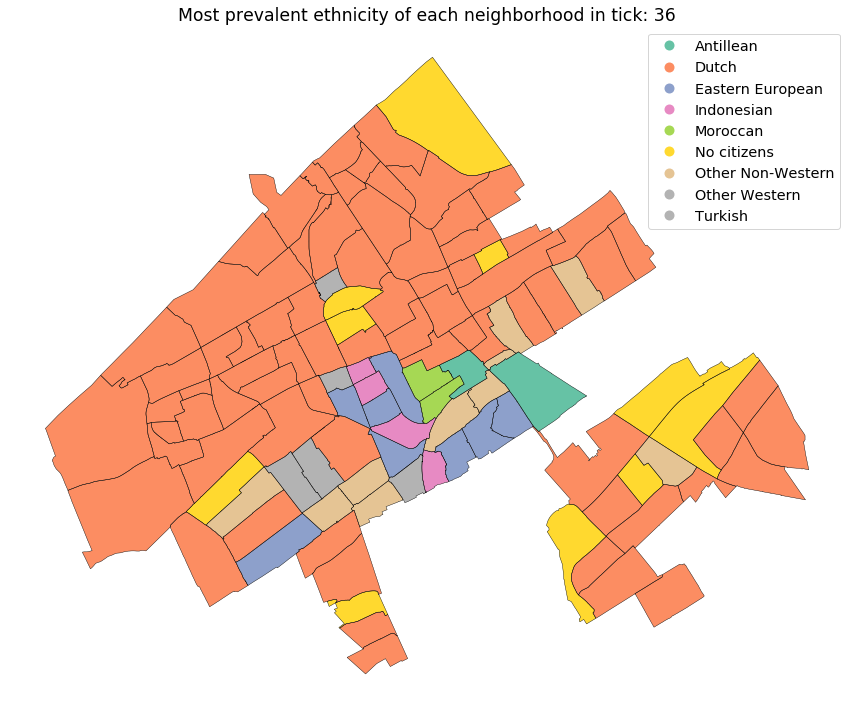

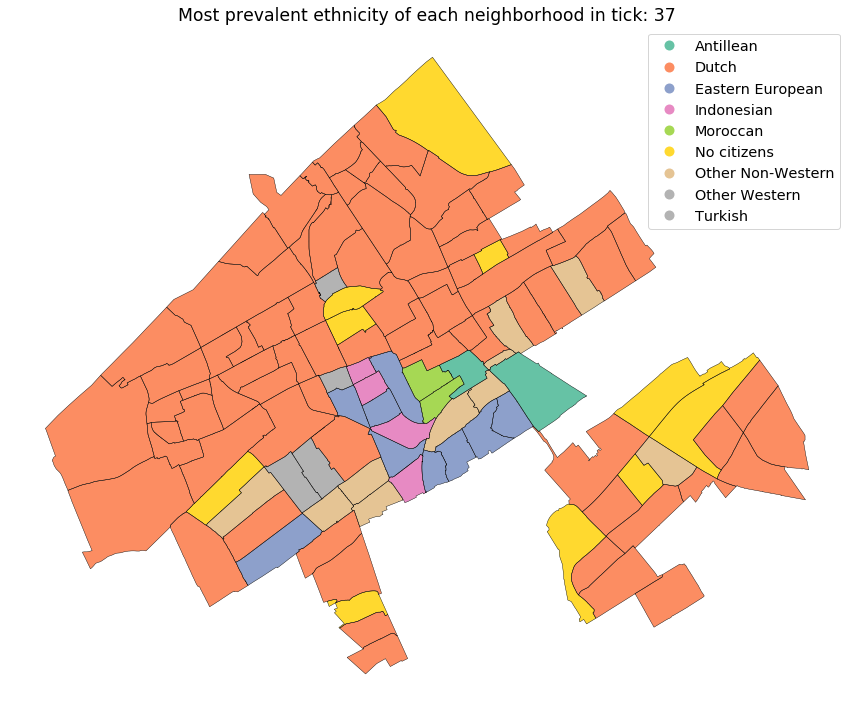

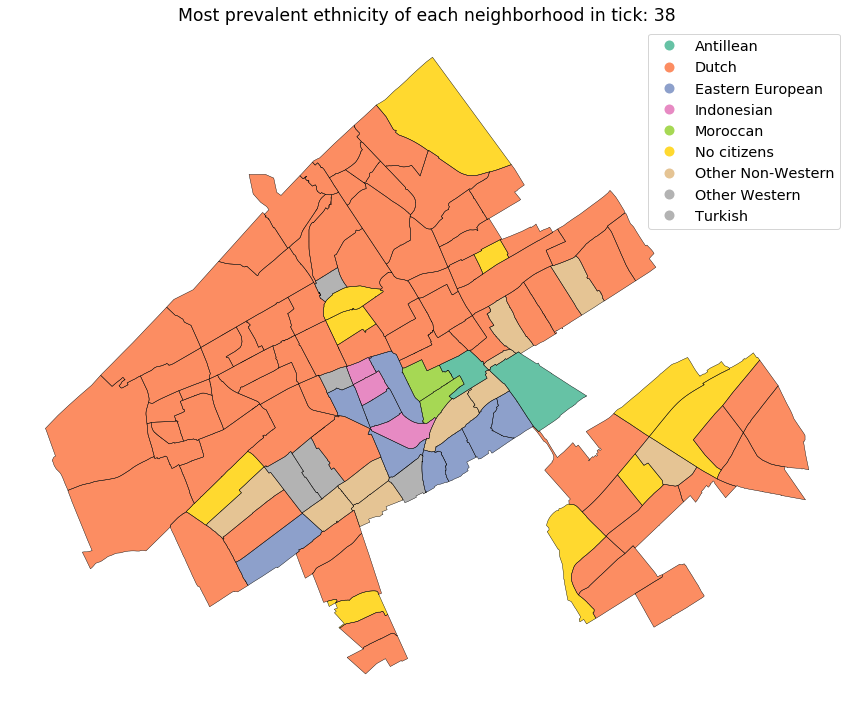

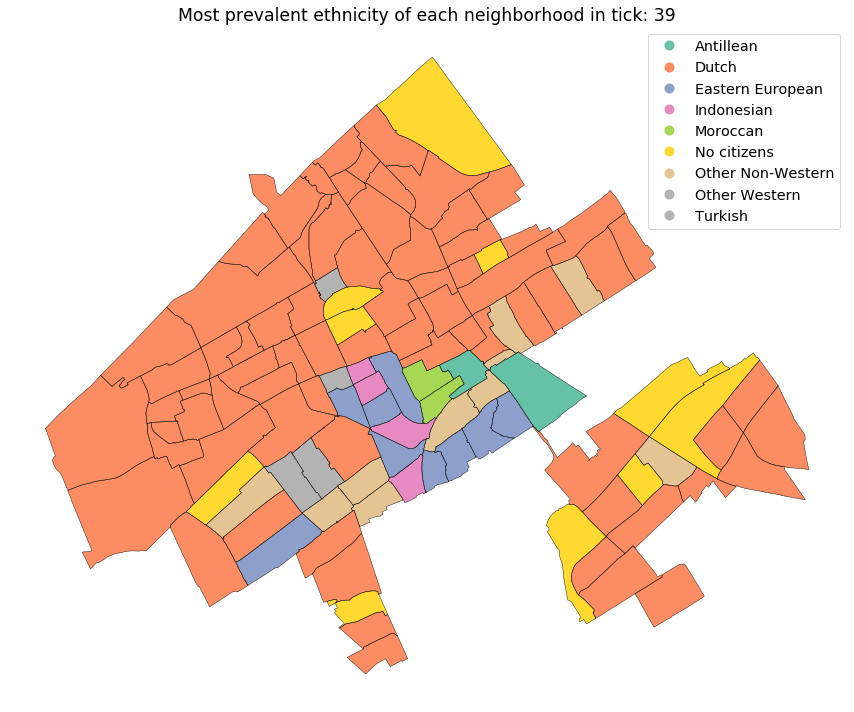

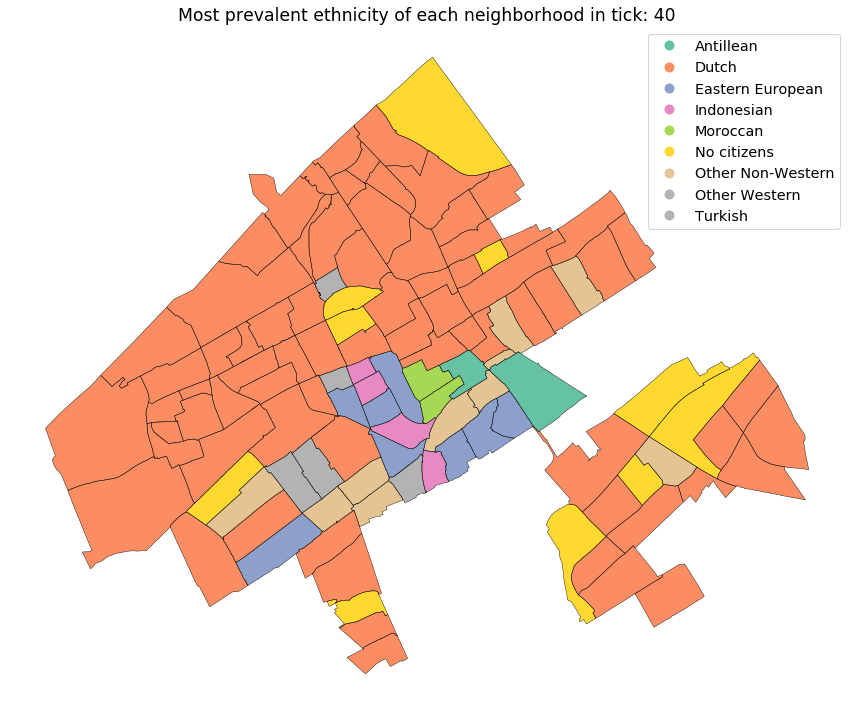

In [66]:
for tick in np.arange(1,41):
    b = gpd.GeoDataFrame(buurten_merge[buurten_merge["[step]"]==tick].groupby("BUURTCODE").mean().reset_index())
    conditions = [
        (b[eth_list].idxmax(axis=1)==eth_list[0]),
        (b[eth_list].idxmax(axis=1)==eth_list[1]),
        (b[eth_list].idxmax(axis=1)==eth_list[2]),
        (b[eth_list].idxmax(axis=1)==eth_list[3]),
        (b[eth_list].idxmax(axis=1)==eth_list[4]),
        (b[eth_list].idxmax(axis=1)==eth_list[5]),
        (b[eth_list].idxmax(axis=1)==eth_list[6]),
        (b[eth_list].idxmax(axis=1)==eth_list[7]),
        (b[eth_list].idxmax(axis=1)==eth_list[8])]
    b['Most_Prevalent_Social_Group'] = np.select(conditions, eth_choices, default="No citizens")
    b['Most_Prevalent_Social_Group'] = np.where(b["c_total"]<60,"No citizens",b["Most_Prevalent_Social_Group"])
    b = b.merge(buurten_merge[["BUURTCODE","geometry"]].drop_duplicates(subset="BUURTCODE"),left_on="BUURTCODE",right_on="BUURTCODE",how="left")
    fig = plt.figure(1, figsize=(15,10)) 
    ax = fig.add_subplot()
    b.boundary.plot(ax=ax, color='Black', linewidth=.4)
    b.plot(ax=ax, cmap='Set2', column='Most_Prevalent_Social_Group', figsize=(12, 12),legend=True, legend_kwds={"fontsize":"x-large"}).axis('off')
    plt.title("Most prevalent ethnicity of each neighborhood in tick: "+str(tick),fontdict={'fontsize': "xx-large"})
    fig.tight_layout()
    #plt.savefig("output/images/map_cluster_nhs_ethnicity_"+str(tick)+".png")
    plt.show()

In [101]:
geojson = f'output/buurten.json'

In [123]:
short_gdf = short_df[short_df["[step]"]==40].groupby("Neighborhood number").mean().reset_index()

In [125]:
short_gdf["Neighborhood number"] = short_gdf["Neighborhood number"].astype(int)

In [127]:
short_gdf

Neighborhood number  [run number]  size-of-std  [step]  KPI-homeless  \
0                      1          48.5         0.05    40.0      12.65625   
1                      2          48.5         0.05    40.0      12.65625   
2                      3          48.5         0.05    40.0      12.65625   
3                      4          48.5         0.05    40.0      12.65625   
4                      5          48.5         0.05    40.0      12.65625   
..                   ...           ...          ...     ...           ...   
109                  117          48.5         0.05    40.0      12.65625   
110                  118          48.5         0.05    40.0      12.65625   
111                  119          48.5         0.05    40.0      12.65625   
112                  120          48.5         0.05    40.0      12.65625   
113                  121          48.5         0.05    40.0      12.65625   

     KPI-homeless-migrants  KPI-available_buy_houses  \
0                     6.25                 131.96875   
1                     6.25                 109.50000   
2                     6.25                1296.09375   
3                     6.25                 257.06250   
4                     6.25                  20.21875   
..                     ...                       ...   
109                   6.25                   0.00000   
110                   6.25                 129.03125   
111                   6.25                  92.00000   
112                   6.25                 312.68750   
113                   6.25                  42.00000   

     KPI-available_part_rent_houses  KPI-available_social_rent_houses  \
0                          47.81250                          80.06250   
1                          12.93750                          41.21875   
2                         582.84375                         206.00000   
3                         155.15625                         188.00000   
4                           2.31250                           0.00000   
..                              ...                               ...   
109                         0.00000                           0.00000   
110                         6.09375                          61.00000   
111                        21.78125                          36.00000   
112                         0.59375                         185.00000   
113                         0.00000                          31.00000   

     KPI-avg_income  ...  KPI-p-sc-upper  KPI-p-dutch  KPI-p-other-western  \
0       28094.12500  ...        0.000094     0.809969             0.080594   
1       35471.50000  ...        0.000000     0.736125             0.061219   
2       39055.62500  ...        0.136250     0.646719             0.153719   
3       36770.06250  ...        0.007000     0.639187             0.150281   
4       88039.18750  ...        0.824313     0.605219             0.263031   
..              ...  ...             ...          ...                  ...   
109     50313.00000  ...        0.000000     0.000000             0.000000   
110     40152.90625  ...        0.211500     0.562188             0.043750   
111     39353.87500  ...        0.172344     0.582687             0.061562   
112     42695.37500  ...        0.554750     0.615156             0.089750   
113     45190.00000  ...        0.524594     0.548406             0.070375   

     KPI-p-antilles  KPI-p-morocco  KPI-p-suriname  KPI-p-turkey  \
0          0.008781       0.004063        0.012344      0.008938   
1          0.012594       0.016125        0.015438      0.038688   
2          0.008750       0.003594        0.037656      0.015781   
3          0.015000       0.015719        0.039250      0.023906   
4          0.003938       0.005219        0.057750      0.008906   
..              ...            ...             ...           ...   
109        0.000000       0.000000        0.000000      0.000000   
110        0.023281       0.030594        0.03287

In [122]:
gpd.read_file(geojson)["BUURTCODE"]

0      108
1      109
2      110
3      104
4      105
      ... 
109     74
110    111
111    112
112    113
113    115
Name: BUURTCODE, Length: 114, dtype: object

In [131]:
m = folium.Map(location=[52.08,4.30],zoom_start=12)
folium.Choropleth(
    geo_data=f'output/buurten.json',
    name='choropleth',
    data=short_gdf,
    columns=['Neighborhood number', 'KPI-p-dutch'],
    key_on='feature.properties.BUURTCODE',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='TEST'
).add_to(m)

folium.LayerControl().add_to(m)
m